In [100]:
import bpmeth
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import xtrack as xt

In [101]:
rho = 0.927
phi = 60/180*np.pi
l_magn = rho*phi
apt = 0.076
hgap = apt/2
theta_E = 17/180*np.pi
B = 5.3810e-07
Brho = B*rho

In [3]:
# x,y,z,phi_m,Ax,Ay,Az,Bx,By,Bz
data = np.loadtxt("ELENA_fieldmap.csv", skiprows=1, delimiter=",")[:, [0,1,2,7,8,9]]

In [93]:
dipole = bpmeth.DipoleFromFieldmap(data, 1/rho, l_magn, design_field=1/rho*1.001803, shape="enge", hgap=apt/2, apt=apt, radius=0.05, order=3, nphi=2)

Fitting multipoles
fitting b1...
fitting b2...
fitting b3...
Central field in the magnet:  5.366707789296275e-07
Average field in the magnet:  5.318425147101888e-07
Rescaling field to match integrated field with design field
Central field in the magnet:  1.0905045742747779
Average field in the magnet:  1.080693635382956
Creating field expansion...
Creating Hamiltonian...


In [94]:
line = xt.Line([dipole])
line.particle_ref = xt.Particles(p0c=0.1, mass0=0.938272, q0=1)

In [95]:
tw = line.twiss(betx=1, bety=1, include_collective=True)

<lambdifygenerated-6292>:2: RuntimeWarning: overflow encountered in exp
  return -y**2*(1.0*x**2*(-0.273981358790439*(0.114366784465307*(5420.4182313544 - 51109.979620707*s)*exp(-4259.16496839225*s**4 + 1806.80607711813*s**3 - 306.096549094244*s**2 - 10.0523557819668*s) + 0.114366784465307*(-25554.9898103535*s**2 + 5420.4182313544*s - 306.096549094244)*(-17036.659873569*s**3 + 5420.4182313544*s**2 - 612.193098188489*s - 10.0523557819668)*exp(-4259.16496839225*s**4 + 1806.80607711813*s**3 - 306.096549094244*s**2 - 10.0523557819668*s) + 16597352.6282499*(-6*s**2 + 1.27264810627903*s - 0.0718677373066838)*(-s**3 + 0.318162026569759*s**2 - 0.0359338686533419*s - 0.000590042640785607)*exp(-4259.16496839225*s**4 + 1806.80607711813*s**3 - 306.096549094244*s**2 - 10.0523557819668*s) + 16597352.6282499*(-17036.659873569*s**3 + 5420.4182313544*s**2 - 612.193098188489*s - 10.0523557819668)*(-s**3 + 0.318162026569759*s**2 - 0.0359338686533419*s - 0.000590042640785607)**2*exp(-4259.16496839225*s**4

In [97]:
print(tw.x,tw.px)
print(tw.betx,tw.alfx)

[ 0.         -0.00068279] [ 0.         -0.00113502]
[1.         1.48580528] [-0.         -0.31375609]


In [99]:
dipole_k0 = 1.0787486515641855
dipole_h = 1.0787486515641855
dipole_len = 0.9707521299592461

line = xt.Line([xt.Drift(length=(dipole.length-dipole_len)/2), xt.Bend(k0=dipole_k0, length=dipole_len, h=dipole_h), xt.Drift(length=(dipole.length-dipole_len)/2)])
line.particle_ref = xt.Particles(energy0=10e9, mass0=xt.PROTON_MASS_EV)

t = line.twiss4d(betx=1, bety=1, include_collective=True)
print(t.betx,tw.alfx)

[1.         1.02085136 1.01563471 0.99397162] [-0.         -0.31375609]


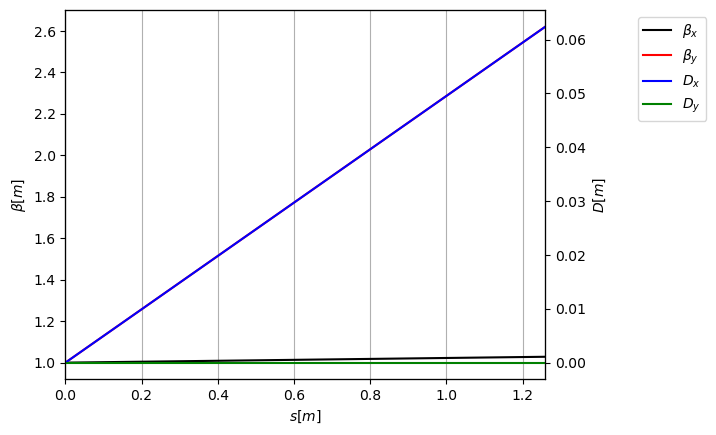

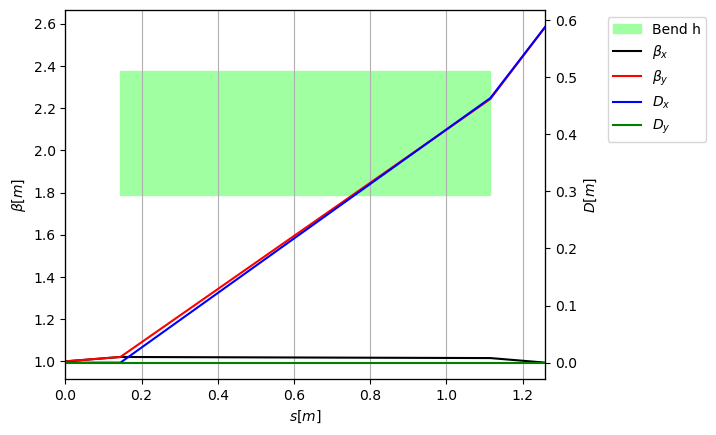

In [28]:
tw.plot()
t.plot()